In [290]:
# 数据清洗,部分参考Kaggle文章《Stacked Regressions to predict House Prices》等
# 包含缺失值补充，特征选择，数值填充数值型数据，one-hot编码填充非数值型数据，特征缩放，标准化等
# 因为，使用线性回归需要满足线性、独立性、正态性、方差齐性、自变量间不存在多重共线、因变量为连续变量。
import pandas as pd
import numpy as np
all_data = pd.read_csv('train_initial.csv')
pd.set_option('display.max_columns', None)   # 显示完整的列
pd.set_option('display.max_rows', None)  # 显示完整的行
pd.set_option('display.expand_frame_repr', False)  # 设置不折叠数据
pd.set_option('display.max_colwidth', 100)

In [291]:
# 显示前五行
all_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [292]:
# ID列对之后的模型建立没有帮助，应该删除
all_data_ID = all_data['Id']# 删除前备份
all_data.drop("Id", axis = 1, inplace = True)

In [293]:
# 显示当前样本和特征数量
print(all_data.shape)

(1460, 80)


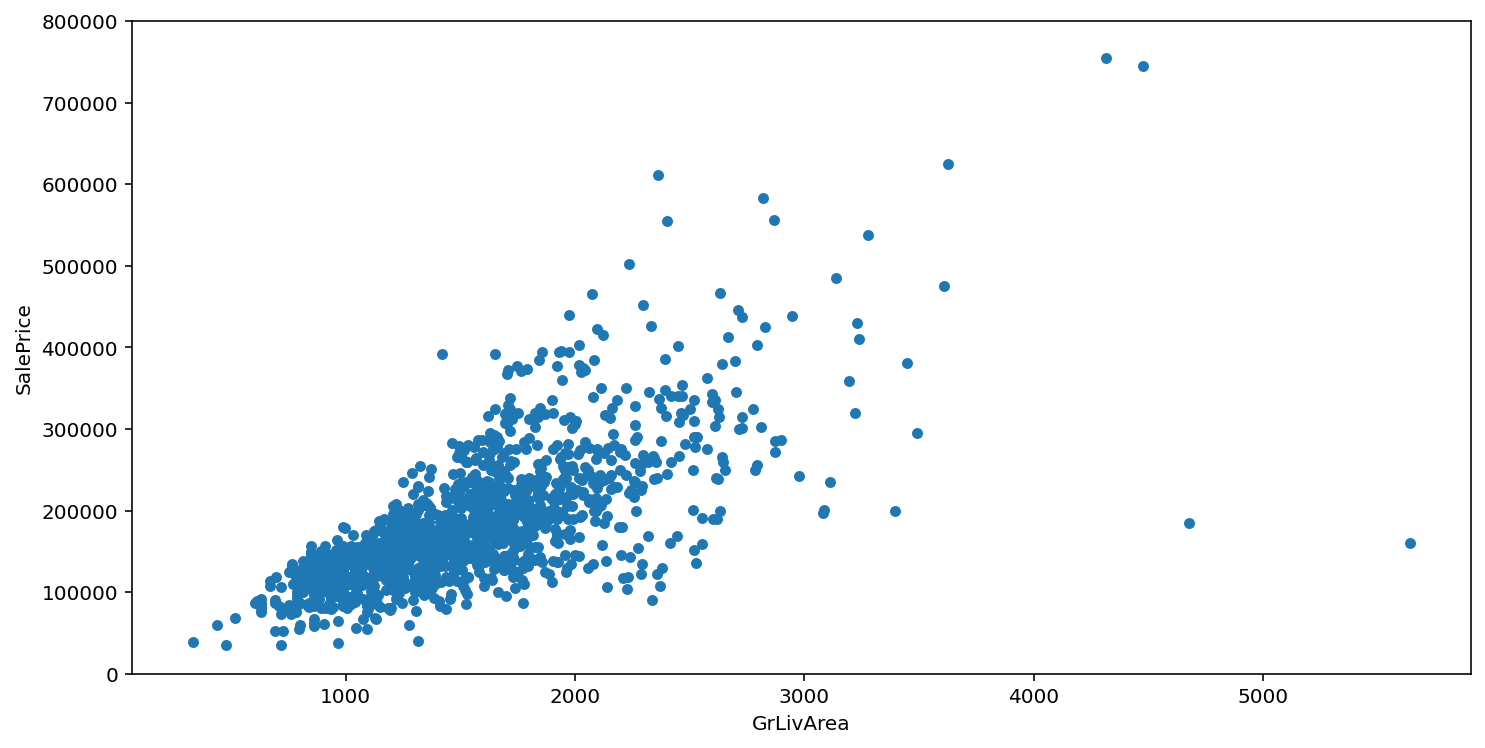

In [294]:
# 离群值处理
var = 'GrLivArea'
data = pd.concat([all_data['SalePrice'], all_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000)); 

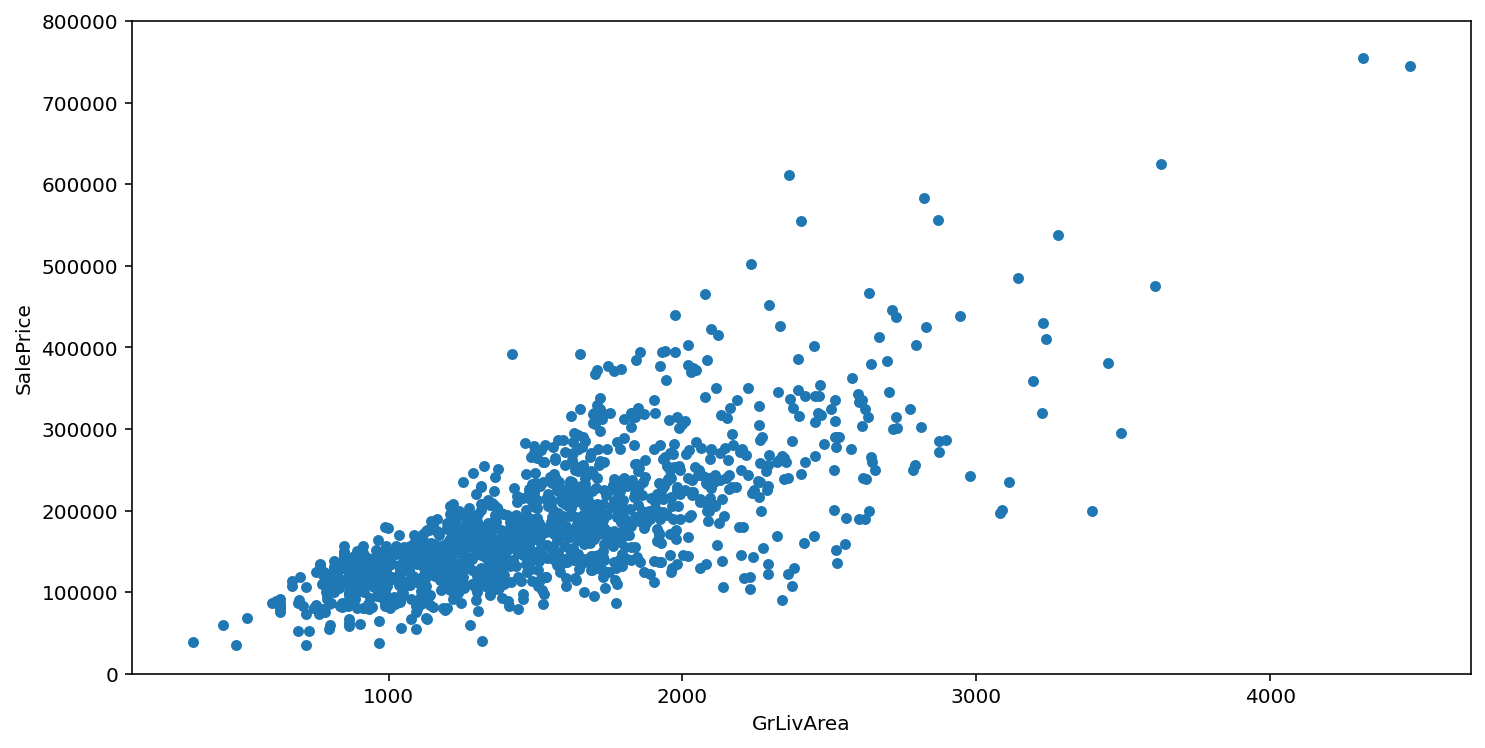

In [295]:
# 可以发现右侧有两个数据显然不合理，予以去除
# 删除极端离群值通常对回归有益无害
all_data = all_data.drop(all_data[(all_data['GrLivArea']>4000) & (all_data['SalePrice']<300000)].index)
var = 'GrLivArea'
data = pd.concat([all_data['SalePrice'], all_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000)); 

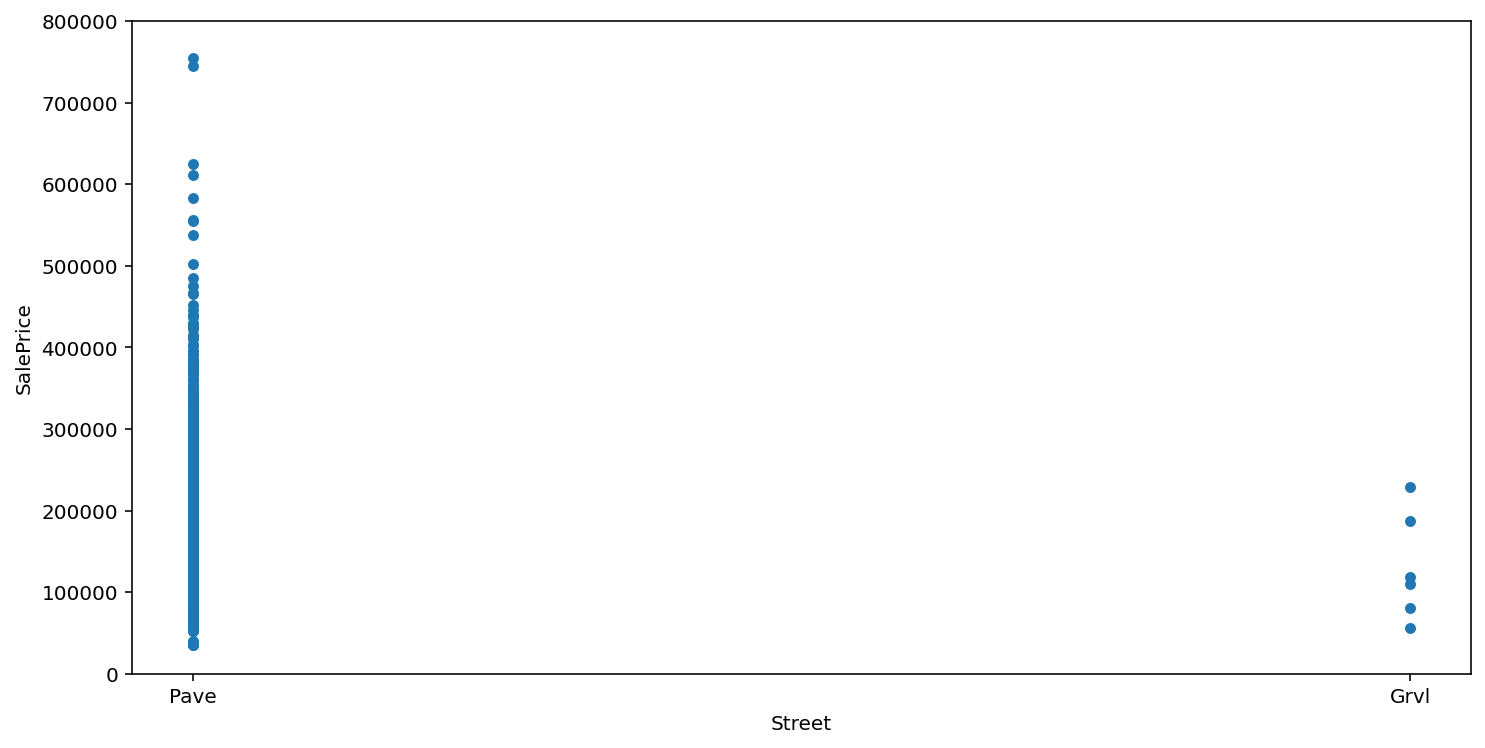

In [296]:
# 将其他数值型数据按照同样方法图示分析，如果与价格没有明显关系，可以考虑删除（具体每个图示过程已省略）
# 如下方Street特征，很明显大部分样本都属'Pave’,仅有几个属于'Grvl'，该特征应予以删除
all_data = all_data.drop(all_data[(all_data['GrLivArea']>4000) & (all_data['SalePrice']<300000)].index)
var = 'Street'# var换成不同数值型特征
data = pd.concat([all_data['SalePrice'], all_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000)); 

In [297]:
# 缺失值补充
# 查看缺失率
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'缺失率' :all_data_na})
print(missing_data)

                    缺失率
PoolQC        99.588477
MiscFeature   96.296296
Alley         93.758573
Fence         80.727023
FireplaceQu   47.325103
LotFrontage   17.764060
GarageYrBlt    5.555556
GarageType     5.555556
GarageFinish   5.555556
GarageQual     5.555556
GarageCond     5.555556
BsmtFinType2   2.606310
BsmtExposure   2.606310
BsmtFinType1   2.537723
BsmtCond       2.537723
BsmtQual       2.537723
MasVnrArea     0.548697
MasVnrType     0.548697
Electrical     0.068587


In [298]:
# 依次补充缺失值
# PoolQC，代表泳池质量，NA代表无，因此用NA填充缺失值。
all_data["PoolQC"] = all_data["PoolQC"].fillna("NA")

In [299]:
# MiscFeature，代表其他未涵盖特征，NA代表无，因此用NA填充缺失值。
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("NA")

In [300]:
# Alley，代表路的材质，NA代表无，因此用NA填充缺失值。
all_data["Alley"] = all_data["Alley"].fillna("NA")

In [301]:
# Fence，代表栅栏质量，NA代表无，因此用NA填充缺失值。
all_data["Fence"] = all_data["Fence"].fillna("NA")

In [302]:
# FireplaceQu，代表壁炉质量，NA代表无，因此用NA填充缺失值。
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("NA")

In [303]:
# LotFrontage，代表最近街道的直线距离，因为由于每条街道与该房屋相连的区域与其邻近的其他房屋很可能相似，因此采用其社区的中位数来填充缺失值。
# 按照‘Neighborhood’分组，每组用中位数填充缺失值。
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [304]:
# GarageType,GarageFinish,GarageQual，GarageCond，代表与车库相关的非数值特征，因此用NA填充缺失值。
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('NA')

In [305]:
# GarageYrBlt,GarageArea，GarageCars，代表与车库相关的数值特征，因此用0填充缺失值。
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [306]:
# BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,代表与地下室相关的数值特征，因此用0填充缺失值。
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

In [307]:
# BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,代表与地下室相关的非数值特征，因此用NA填充缺失值。
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('NA')

In [308]:
# MasVnrArea,MasVnrType,代表砖石漆面，NA或0代表无。
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("NA")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [309]:
# MSZoning，代表所在地区分类，用多数值（‘RL’）填充。
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [310]:
# Utilities，代表公共设施类型，该特征仅有几个样本存在不是‘ALLPUB’，对最终模型的建立帮助不大，予以去除
all_data = all_data.drop(['Utilities'], axis=1)

In [311]:
# Functional，用典型值替换
all_data["Functional"] = all_data["Functional"].fillna("Typ")

In [312]:
# Electrical，仅有一个样本缺失，用多数值('SBrkr')填充
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [313]:
# KitchenQual，做法同上
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [314]:
# Exterior1st，Exterior2nd，同上
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In [315]:
# SaleType，同上
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [317]:
# 检查缺失值
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'缺失率' :all_data_na})
print(missing_data)

Empty DataFrame
Columns: [缺失率]
Index: []


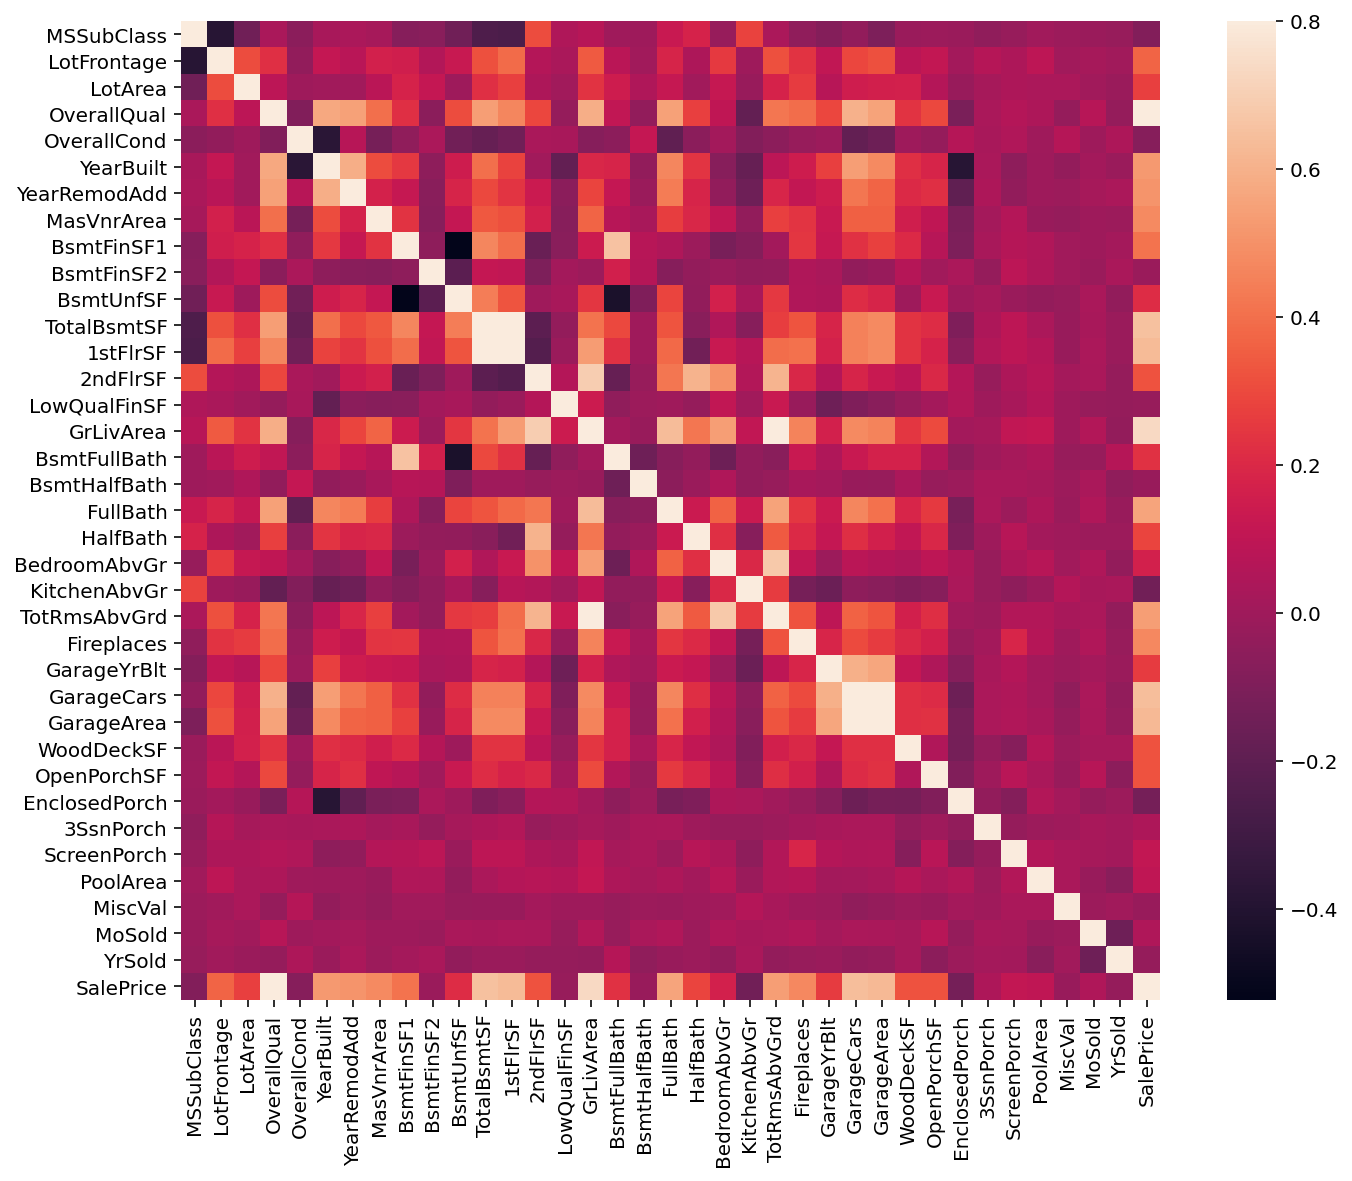

In [318]:
# 缺失值已填充完毕。
# 显示并分析数值数据间的相关性
import matplotlib.pyplot as plt
import seaborn as sns
corrmat = all_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [319]:
# 查看当前数据规模
print(all_data.shape)

(1458, 79)


In [320]:
# 总面积对房价预测十分重要，添加一个每个房子的地下室、一楼和二楼的总面积特征
# all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
t = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data.insert(78, 'TotalSF', t)

In [321]:
# 根据特征间的相关性，特征与价格是否有明显关系，特征具体实质内容进行分析并删除一部分对最终模型建立帮助不大的特征
all_data.drop(['MSZoning'], axis=1, inplace=True)
all_data.drop(['LotArea'], axis=1, inplace=True)
all_data.drop(['Street'], axis=1, inplace=True)
all_data.drop(['Alley'], axis=1, inplace=True)
all_data.drop(['LotShape'], axis=1, inplace=True)
all_data.drop(['LotConfig'], axis=1, inplace=True)
all_data.drop(['LandSlope'], axis=1, inplace=True)
all_data.drop(['Neighborhood'], axis=1, inplace=True)
all_data.drop(['Condition1'], axis=1, inplace=True)
all_data.drop(['Condition2'], axis=1, inplace=True)
all_data.drop(['BldgType'], axis=1, inplace=True)
all_data.drop(['HouseStyle'], axis=1, inplace=True)
all_data.drop(['RoofMatl'], axis=1, inplace=True)
all_data.drop(['Exterior1st'], axis=1, inplace=True)
all_data.drop(['Exterior2nd'], axis=1, inplace=True)
all_data.drop(['MasVnrType'], axis=1, inplace=True)
all_data.drop(['Foundation'], axis=1, inplace=True)
all_data.drop(['BsmtQual'], axis=1, inplace=True)
all_data.drop(['BsmtFinType1'], axis=1, inplace=True)
all_data.drop(['BsmtFinSF1'], axis=1, inplace=True)
all_data.drop(['BsmtFinType2'], axis=1, inplace=True)
all_data.drop(['BsmtFinSF2'], axis=1, inplace=True)
all_data.drop(['BsmtUnfSF'], axis=1, inplace=True)
all_data.drop(['Heating'], axis=1, inplace=True)
all_data.drop(['Electrical'], axis=1, inplace=True)
all_data.drop(['LowQualFinSF'], axis=1, inplace=True)
all_data.drop(['BsmtFullBath'], axis=1, inplace=True)
all_data.drop(['BsmtHalfBath'], axis=1, inplace=True)
all_data.drop(['KitchenQual'], axis=1, inplace=True)
all_data.drop(['TotRmsAbvGrd'], axis=1, inplace=True)
all_data.drop(['Functional'], axis=1, inplace=True)
all_data.drop(['FireplaceQu'], axis=1, inplace=True)
all_data.drop(['GarageType'], axis=1, inplace=True)
all_data.drop(['GarageCond'], axis=1, inplace=True)
all_data.drop(['PavedDrive'], axis=1, inplace=True)
all_data.drop(['WoodDeckSF'], axis=1, inplace=True)
all_data.drop(['OpenPorchSF'], axis=1, inplace=True)
all_data.drop(['EnclosedPorch'], axis=1, inplace=True)
all_data.drop(['3SsnPorch'], axis=1, inplace=True)
all_data.drop(['ScreenPorch'], axis=1, inplace=True)
all_data.drop(['PoolArea'], axis=1, inplace=True)
all_data.drop(['Fence'], axis=1, inplace=True)
all_data.drop(['MoSold'], axis=1, inplace=True)
all_data.drop(['YrSold'], axis=1, inplace=True)
all_data.drop(['SaleType'], axis=1, inplace=True)
all_data.drop(['PoolQC'], axis=1, inplace=True)
all_data.drop(['MiscVal'], axis=1, inplace=True)

In [322]:
# 查看当前数据规模
print(all_data.shape)

(1458, 33)


In [323]:
all_data.head(10)

,MSSubClass,LotFrontage,LandContour,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,MasVnrArea,ExterQual,ExterCond,BsmtCond,BsmtExposure,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,MiscFeature,SaleCondition,TotalSF,SalePrice
0,60,65.0,Lvl,7,5,2003,2003,Gable,196.0,Gd,TA,TA,No,856,Ex,Y,856,854,1710,2,1,3,1,0,2003.0,RFn,2,548,TA,NA,Normal,2566,208500
1,20,80.0,Lvl,6,8,1976,1976,Gable,0.0,TA,TA,TA,Gd,1262,Ex,Y,1262,0,1262,2,0,3,1,1,1976.0,RFn,2,460,TA,NA,Normal,2524,181500
2,60,68.0,Lvl,7,5,2001,2002,Gable,162.0,Gd,TA,TA,Mn,920,Ex,Y,920,866,1786,2,1,3,1,1,2001.0,RFn,2,608,TA,NA,Normal,2706,223500
3,70,60.0,Lvl,7,5,1915,1970,Gable,0.0,TA,TA,Gd,No,756,Gd,Y,961,756,1717,1,0,3,1,1,1998.0,Unf,3,642,TA,NA,Abnorml,2473,140000
4,60,84.0,Lvl,8,5,2000,2000,Gable,350.0,Gd,TA,TA,Av,1145,Ex,Y,1145,1053,2198,2,1,4,1,1,2000.0,RFn,3,836,TA,NA,Normal,3343,250000
5,50,85.0,Lvl,5,5,1993,1995,Gable,0.0,TA,TA,TA,No,796,Ex,Y,796,566,1362,1,1,1,1,0,1993.0,Unf,2,480,TA,Shed,Normal,2158,143000
6,20,75.0,Lvl,8,5,2004,2005,Gable,186.0,Gd,TA,TA,Av,1686,Ex,Y,1694,0,1694,2,0,3,1,1,2004.0,RFn,2,636,TA,NA,Normal,3380,307000
7,60,80.0,Lvl,7,6,1973,1973,Gable,240.0,TA,TA,TA,Mn,1107,Ex,Y,1107,983,2090,2,1,3,1,2,1973.0,RFn,2,484,TA,Shed,Normal,3197,200000
8,50,51.0,Lvl,7,5,1931,1950,Gable,0.0,TA,TA,TA,No,952,Gd,Y,1022,752,1774,2,0,2,2,2,1931.0,Unf,2,468,Fa,NA,Abnorml,2726,129900
9,190,50.0,Lvl,5,6,1939,1950,Gable,0.0,TA,TA,TA,No,991,Ex,Y,1077,0,1077,1,0,2,2,2,1939.0,RFn,1,205,Gd,NA,Normal,2068,118000


In [324]:
# 某些非数值特征具有明显的线性关系，可以用数值替换，避免不好处理的分类问题
# 如     ExterQual
#        Ex Excellent
#        Gd Good
#        TA Average/Typical
#        Fa Fair
#        Po Poor
# 依次用5,4,3,2,1表示
all_data.loc[all_data['ExterQual']=='Ex','ExterQual']=5
all_data.loc[all_data['ExterQual']=='Gd','ExterQual']=4
all_data.loc[all_data['ExterQual']=='TA','ExterQual']=3
all_data.loc[all_data['ExterQual']=='Fa','ExterQual']=2
all_data.loc[all_data['ExterQual']=='Po','ExterQual']=1
# ExterCond
all_data.loc[all_data['ExterCond']=='Ex','ExterCond']=5
all_data.loc[all_data['ExterCond']=='Gd','ExterCond']=4
all_data.loc[all_data['ExterCond']=='TA','ExterCond']=3
all_data.loc[all_data['ExterCond']=='Fa','ExterCond']=2
all_data.loc[all_data['ExterCond']=='Po','ExterCond']=1
# BsmtCond
all_data.loc[all_data['BsmtCond']=='Ex','BsmtCond']=5
all_data.loc[all_data['BsmtCond']=='Gd','BsmtCond']=4
all_data.loc[all_data['BsmtCond']=='TA','BsmtCond']=3
all_data.loc[all_data['BsmtCond']=='Fa','BsmtCond']=2
all_data.loc[all_data['BsmtCond']=='Po','BsmtCond']=1
all_data.loc[all_data['BsmtCond']=='NA','BsmtCond']=0
# BsmtExposure
all_data.loc[all_data['BsmtExposure']=='Gd','BsmtExposure']=4
all_data.loc[all_data['BsmtExposure']=='Av','BsmtExposure']=3
all_data.loc[all_data['BsmtExposure']=='Mn','BsmtExposure']=2
all_data.loc[all_data['BsmtExposure']=='No','BsmtExposure']=1
all_data.loc[all_data['BsmtExposure']=='NA','BsmtExposure']=0
# HeatingQC
all_data.loc[all_data['ExterCond']=='Ex','ExterCond']=5
all_data.loc[all_data['ExterCond']=='Gd','ExterCond']=4
all_data.loc[all_data['ExterCond']=='TA','ExterCond']=3
all_data.loc[all_data['ExterCond']=='Fa','ExterCond']=2
all_data.loc[all_data['ExterCond']=='Po','ExterCond']=1
# CentralAir
all_data.loc[all_data['CentralAir']=='Y','CentralAir']=1
all_data.loc[all_data['CentralAir']=='N','CentralAir']=0
# GarageQual
all_data.loc[all_data['GarageQual']=='Ex','GarageQual']=5
all_data.loc[all_data['GarageQual']=='Gd','GarageQual']=4
all_data.loc[all_data['GarageQual']=='TA','GarageQual']=3
all_data.loc[all_data['GarageQual']=='Fa','GarageQual']=2
all_data.loc[all_data['GarageQual']=='Po','GarageQual']=1
all_data.loc[all_data['GarageQual']=='NA','GarageQual']=0
# MiscFeature
all_data.loc[all_data['MiscFeature']!='NA','MiscFeature']=1
all_data.loc[all_data['MiscFeature']=='NA','MiscFeature']=0
# HeatingQC
all_data.loc[all_data['HeatingQC']=='Ex','HeatingQC']=5
all_data.loc[all_data['HeatingQC']=='Gd','HeatingQC']=4
all_data.loc[all_data['HeatingQC']=='TA','HeatingQC']=3
all_data.loc[all_data['HeatingQC']=='Fa','HeatingQC']=2
all_data.loc[all_data['HeatingQC']=='Po','HeatingQC']=1

In [325]:
# 对于没有明显关系的变量采用one-hot编码（LandContour、RoofStyle、GarageFinish、SaleCondition）
# LandContour
all_data.loc[all_data['LandContour']=='Lvl','LandContour_Lvl']=1
all_data.loc[all_data['LandContour']=='Bnk','LandContour_Bnk']=1
all_data.loc[all_data['LandContour']=='HLS','LandContour_HLS']=1
all_data.loc[all_data['LandContour']=='Low','LandContour_Low']=1
for col in ('LandContour_Lvl', 'LandContour_Bnk', 'LandContour_HLS','LandContour_Low'):
    all_data[col] = all_data[col].fillna(0)

# RoofStyle
all_data.loc[all_data['RoofStyle']=='Flat','RoofStyle_Flat']=1
all_data.loc[all_data['RoofStyle']=='Gable','RoofStyle_Gable']=1
all_data.loc[all_data['RoofStyle']=='Gambrel','RoofStyle_Gambrel']=1
all_data.loc[all_data['RoofStyle']=='Hip','RoofStyle_Hip']=1
all_data.loc[all_data['RoofStyle']=='Mansard','RoofStyle_Mansard']=1
all_data.loc[all_data['RoofStyle']=='Shed','RoofStyle_Shed']=1
for col in ('RoofStyle_Flat','RoofStyle_Gable','RoofStyle_Gambrel','RoofStyle_Hip','RoofStyle_Mansard','RoofStyle_Shed'):
    all_data[col] = all_data[col].fillna(0)
# GarageFinish
all_data.loc[all_data['GarageFinish']=='Fin','GarageFinish_Fin']=1
all_data.loc[all_data['GarageFinish']=='RFn','GarageFinish_RFn']=1
all_data.loc[all_data['GarageFinish']=='Unf','GarageFinish_Unf']=1
all_data.loc[all_data['GarageFinish']=='NA','GarageFinish_NA']=1
for col in ('GarageFinish_Fin','GarageFinish_RFn','GarageFinish_Unf','GarageFinish_NA'):
    all_data[col] = all_data[col].fillna(0)
# SaleCondition
all_data.loc[all_data['SaleCondition']=='Normal','SaleCondition_Normal']=1
all_data.loc[all_data['SaleCondition']=='Abnorml','SaleCondition_Abnorml']=1
all_data.loc[all_data['SaleCondition']=='AdjLand','SaleCondition_AdjLand']=1
all_data.loc[all_data['SaleCondition']=='Alloca','SaleCondition_Alloca']=1
all_data.loc[all_data['SaleCondition']=='Family','SaleCondition_Family']=1
all_data.loc[all_data['SaleCondition']=='Partial','SaleCondition_Partial']=1
for col in ('SaleCondition_Normal','SaleCondition_Abnorml','SaleCondition_AdjLand','SaleCondition_Alloca','SaleCondition_Family','SaleCondition_Partial'):
    all_data[col] = all_data[col].fillna(0)

In [326]:
# 删除已被onehot编码的特征
all_data.drop("LandContour", axis = 1, inplace = True)
all_data.drop("RoofStyle", axis = 1, inplace = True)
all_data.drop("GarageFinish", axis = 1, inplace = True)
all_data.drop("SaleCondition", axis = 1, inplace = True)

In [327]:
# SalePrice放在最后一列，便于浏览
all_data['Saleprice']=all_data['SalePrice']
all_data.drop("SalePrice", axis = 1, inplace = True)
all_data['SalePrice']=all_data['Saleprice']
all_data.drop("Saleprice", axis = 1, inplace = True)

In [328]:
all_data.head(10)

,MSSubClass,LotFrontage,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtCond,BsmtExposure,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageCars,GarageArea,GarageQual,MiscFeature,TotalSF,LandContour_Lvl,LandContour_Bnk,LandContour_HLS,LandContour_Low,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_NA,SaleCondition_Normal,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Partial,SalePrice
0,60,65.0,7,5,2003,2003,196.0,4,3,3,1,856,5,1,856,854,1710,2,1,3,1,0,2003.0,2,548,3,0,2566,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,208500
1,20,80.0,6,8,1976,1976,0.0,3,3,3,4,1262,5,1,1262,0,1262,2,0,3,1,1,1976.0,2,460,3,0,2524,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,181500
2,60,68.0,7,5,2001,2002,162.0,4,3,3,2,920,5,1,920,866,1786,2,1,3,1,1,2001.0,2,608,3,0,2706,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,223500
3,70,60.0,7,5,1915,1970,0.0,3,3,4,1,756,4,1,961,756,1717,1,0,3,1,1,1998.0,3,642,3,0,2473,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,140000
4,60,84.0,8,5,2000,2000,350.0,4,3,3,3,1145,5,1,1145,1053,2198,2,1,4,1,1,2000.0,3,836,3,0,3343,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,250000
5,50,85.0,5,5,1993,1995,0.0,3,3,3,1,796,5,1,796,566,1362,1,1,1,1,0,1993.0,2,480,3,1,2158,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,143000
6,20,75.0,8,5,2004,2005,186.0,4,3,3,3,1686,5,1,1694,0,1694,2,0,3,1,1,2004.0,2,636,3,0,3380,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,307000
7,60,80.0,7,6,1973,1973,240.0,3,3,3,2,1107,5,1,1107,983,2090,2,1,3,1,2,1973.0,2,484,3,1,3197,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,200000
8,50,51.0,7,5,1931,1950,0.0,3,3,3,1,952,4,1,1022,752,1774,2,0,2,2,2,1931.0,2,468,2,0,2726,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,129900
9,190,50.0,5,6,1939,1950,0.0,3,3,3,1,991,5,1,1077,0,1077,1,0,2,2,2,1939.0,1,205,4,0,2068,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,118000


In [329]:
all_data.describe()

,MSSubClass,LotFrontage,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageCars,GarageArea,TotalSF,LandContour_Lvl,LandContour_Bnk,LandContour_HLS,LandContour_Low,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_NA,SaleCondition_Normal,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Partial,SalePrice
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.00000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,56.893004,69.986626,6.093964,5.576132,1971.218107,1984.834019,102.189986,1052.537037,1158.851166,345.762003,1510.465706,1.563786,0.38203,2.866255,1.046639,0.611111,1868.549383,1.766118,472.050069,2557.150206,0.899177,0.041838,0.034294,0.024691,0.008916,0.782579,0.007545,0.194787,0.004801,0.001372,0.240055,0.289438,0.414952,0.055556,0.821674,0.069273,0.002743,0.008230,0.013717,0.084362,180932.919067
std,42.329437,21.470375,1.376369,1.113359,30.193754,20.641760,179.109864,414.982320,372.039498,435.423924,507.878508,0.549891,0.50271,0.816323,0.220483,0.641988,453.979431,0.747104,212.239248,774.109803,0.301198,0.200288,0.182045,0.155236,0.094037,0.412633,0.086561,0.396173,0.069147,0.037024,0.427263,0.453657,0.492883,0.229140,0.382919,0.254005,0.052324,0.090379,0.116355,0.278026,79495.055285
min,20.000000,21.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,20.000000,60.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,795.250000,882.000000,0.000000,1128.500000,1.000000,0.00000,2.000000,1.000000,0.000000,1958.000000,1.000000,331.500000,2008.500000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129925.000000
50%,50.000000,70.000000,6.000000,5.000000,1972.500000,1994.000000,0.000000,991.000000,1086.000000,0.000000,1461.500000,2.000000,0.00000,3.000000,1.000000,1.000000,1977.000000,2.000000,479.500000,2473.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,70.000000,80.000000,7.000000,6.000000,2000.000000,2004.000000,163.750000,1296.750000,1390.750000,728.000000,1776.000000,2.000000,1.00000,3.000000,1.000000,1.000000,2001.000000,2.000000,576.000000,3002.250000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,190.000000,313.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,3206.000000,3228.000000,2065.000000,4476.000000,3.000000,2.00000,8.000000,3.000000,3.000000,2010.000000,4.000000,1390.000000,6872.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,755000.000000


In [330]:
print(all_data.shape)

(1458, 49)


In [331]:
# 因为采用岭回归而非纯粹线性回归，需对所有特征执行特征缩放
# x=x-平均值/标准差
for col in ('MSSubClass','LotFrontage','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','ExterQual','ExterCond','BsmtCond','BsmtExposure','HeatingQC','CentralAir','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','Fireplaces','GarageYrBlt','GarageCars','GarageArea','GarageQual','MiscFeature','TotalSF','LandContour_Lvl','LandContour_Bnk','LandContour_HLS','LandContour_Low','RoofStyle_Flat','RoofStyle_Gable','RoofStyle_Gambrel','RoofStyle_Hip','RoofStyle_Mansard','RoofStyle_Shed','GarageFinish_Fin','GarageFinish_RFn','GarageFinish_Unf','GarageFinish_NA','SaleCondition_Normal','SaleCondition_Abnorml','SaleCondition_AdjLand','SaleCondition_Alloca','SaleCondition_Family','SaleCondition_Partial'):
    all_data[col] = (all_data[col]-all_data[col].mean())/all_data[col].std()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000212652B2FA0>,
      dtype=object)

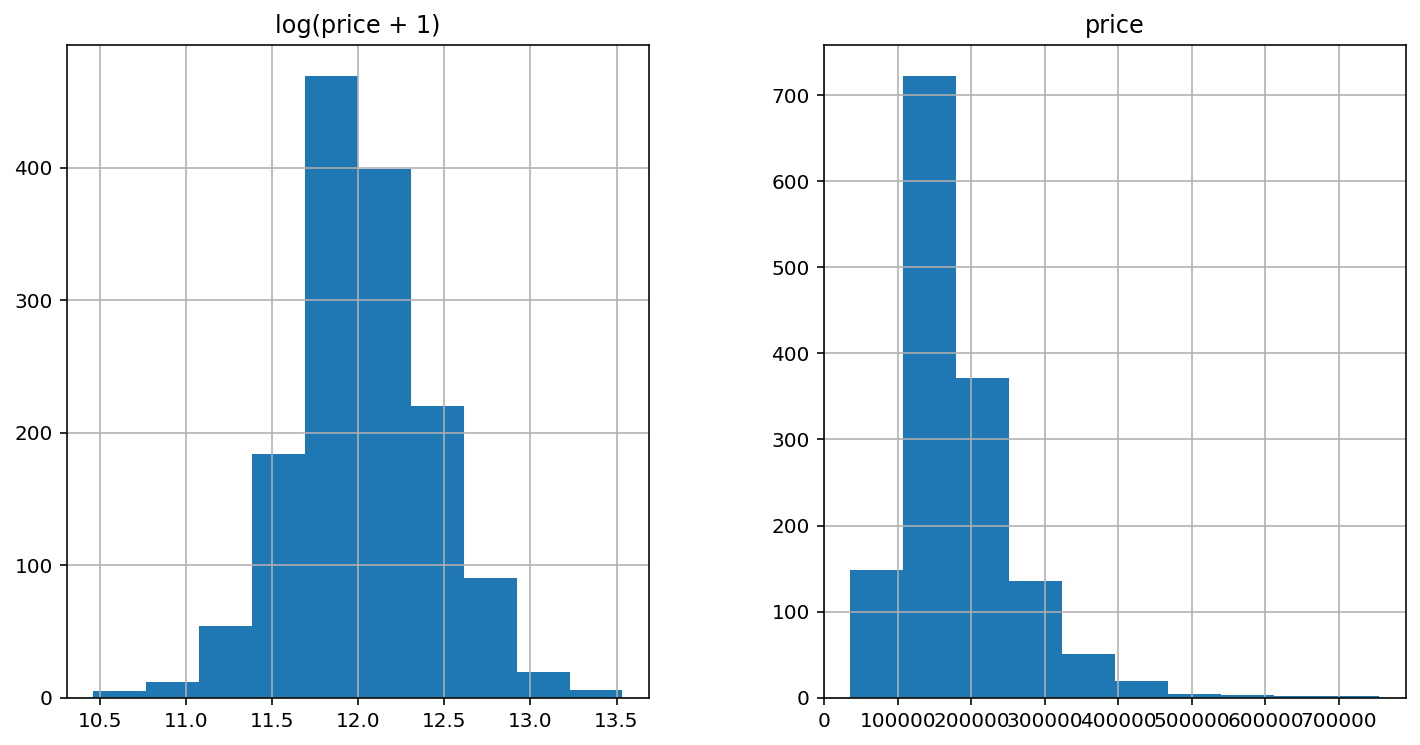

In [332]:
# 线性回归模型拟合数据之前，首先要求数据应符合或近似符合正态分布
# 对因变量Saleprice也进行处理。首先分析Saleprice的分布规律
import matplotlib
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":all_data["SalePrice"], "log(price + 1)":np.log1p(all_data["SalePrice"])})
prices.hist()

In [333]:
# 由图可以看出saleprice不满足正态分布，而log（price+1）（标准化）后更能满足正态分布
all_data["SalePrice"] = np.log1p(all_data["SalePrice"])

In [334]:
all_data.head(10)

,MSSubClass,LotFrontage,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtCond,BsmtExposure,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageCars,GarageArea,GarageQual,MiscFeature,TotalSF,LandContour_Lvl,LandContour_Bnk,LandContour_HLS,LandContour_Low,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_NA,SaleCondition_Normal,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Partial,SalePrice
0,0.073400,-0.232256,0.658280,-0.517472,1.052598,0.880060,0.523757,1.06075,-0.238203,0.117926,-0.5889,-0.473603,0.891971,0.263915,-0.814030,1.167226,0.392878,0.793273,1.229277,0.163838,-0.211532,-0.951905,0.296160,0.313051,0.357851,0.262644,-0.196049,0.011432,0.334741,-0.20889,-0.18838,-0.159057,-0.094818,0.526912,-0.087159,-0.491673,-0.069433,-0.03705,-0.561843,1.566299,-0.841888,-0.242452,0.465703,-0.272723,-0.052432,-0.091066,-0.117893,-0.303433,12.247699
1,-0.871568,0.466381,-0.068270,2.177078,0.158374,-0.427968,-0.570544,-0.688764,-0.238203,0.117926,2.22931,0.504752,0.891971,0.263915,0.277252,-0.794081,-0.489223,0.793273,-0.759941,0.163838,-0.211532,0.605758,0.236686,0.313051,-0.056776,0.262644,-0.196049,-0.042824,0.334741,-0.20889,-0.18838,-0.159057,-0.094818,0.526912,-0.087159,-0.491673,-0.069433,-0.03705,-0.561843,1.566299,-0.841888,-0.242452,0.465703,-0.272723,-0.052432,-0.091066,-0.117893,-0.303433,12.109016
2,0.073400,-0.092529,0.658280,-0.517472,0.986359,0.831614,0.333929,1.06075,-0.238203,0.117926,0.350505,-0.319380,0.891971,0.263915,-0.642005,1.194785,0.542520,0.793273,1.229277,0.163838,-0.211532,0.605758,0.291755,0.313051,0.640550,0.262644,-0.196049,0.192285,0.334741,-0.20889,-0.18838,-0.159057,-0.094818,0.526912,-0.087159,-0.491673,-0.069433,-0.03705,-0.561843,1.566299,-0.841888,-0.242452,0.465703,-0.272723,-0.052432,-0.091066,-0.117893,-0.303433,12.317171
3,0.309643,-0.465135,0.658280,-0.517472,-1.861912,-0.718641,-0.570544,-0.688764,-0.238203,1.92778,-0.5889,-0.714578,-0.150091,0.263915,-0.531802,0.942158,0.406661,-1.025269,-0.759941,0.163838,-0.211532,0.605758,0.285146,1.651553,0.800747,0.262644,-0.196049,-0.108706,0.334741,-0.20889,-0.18838,-0.159057,-0.094818,0.526912,-0.087159,-0.491673,-0.069433,-0.03705,-0.561843,-0.638010,1.186992,-0.242452,-2.145817,3.664209,-0.052432,-0.091066,-0.117893,-0.303433,11.849405
4,0.073400,0.652684,1.384829,-0.517472,0.953240,0.734723,1.383564,1.06075,-0.238203,0.117926,1.28991,0.222812,0.891971,0.263915,-0.037230,1.624252,1.353738,0.793273,1.229277,1.388844,-0.211532,0.605758,0.289552,1.651553,1.714810,0.262644,-0.196049,1.015166,0.334741,-0.20889,-0.18838,-0.159057,-0.094818,0.526912,-0.087159,-0.491673,-0.069433,-0.03705,-0.561843,1.566299,-0.841888,-0.242452,0.465703,-0.272723,-0.052432,-0.091066,-0.117893,-0.303433,12.429220
5,-0.162842,0.699260,-0.794819,-0.517472,0.721404,0.492496,-0.570544,-0.688764,-0.238203,0.117926,-0.5889,-0.618188,0.891971,0.263915,-0.975303,0.505801,-0.292325,-1.025269,1.229277,-2.286173,-0.211532,-0.951905,0.274133,0.313051,0.037457,0.262644,5.09727,-0.515625,0.334741,-0.20889,-0.18838,-0.159057,-0.094818,0.526912,-0.087159,-0.491673,-0.069433,-0.03705,-0.561843,-0.638010,1.186992,-0.242452,0.465703,-0.272723,-0.052432,-0.091066,-0.117893,-0.303433,11.870607
6,-0.871568,0.233502,1.384829,-0.517472,1.085718,0.976951,0.467925,1.06075,-0.238203,0.117926,1.28991,1.526482,0.891971,0.263915,1.438419,-0.794081,0.361374,0.793273,-0.759941,0.163838,-0.211532,0.605758,0.298363,0.313051,0.772477,0.262644,-0.196049,1.062963,0.334741,-0.20889,-0.18838,-0.159057,-0.094818,0.526912,-0.087159,-0.491673,-0.069433,-0.03705,-0.561843,1.566299,-0.841888,-0.242452,0.465703,-0.272723,-0.052432,-0.091066,-0.117893,-0.303433,12.634606
7,0.073400,0.466381,0.658280,0.380711,0.059015,-0.573305,0.769416,-0.6887

In [335]:
# 数据导出
all_data.to_csv('train.csv', index=False)

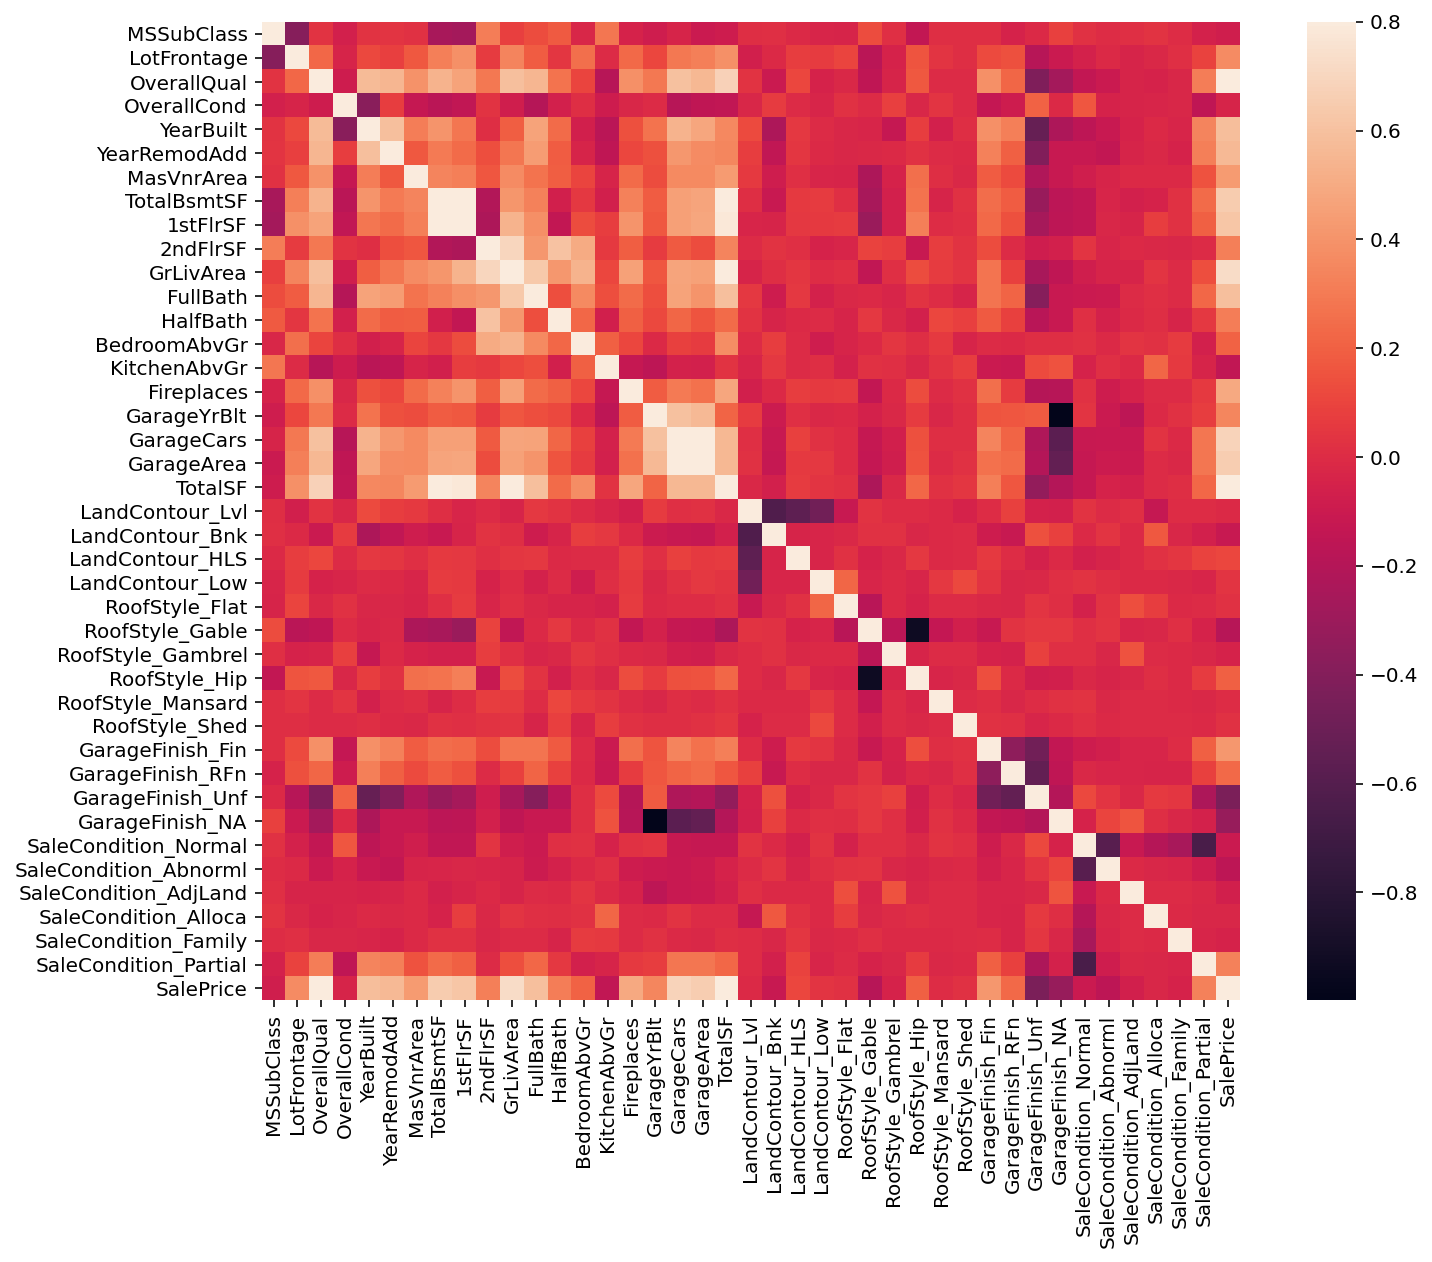

In [336]:
# 建模后发现数据特征太多，效果不理想，进一步清洗。具体分析详见建模文档。
corrmat = all_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [337]:
# 重新按照原有步骤分析，再删除一些数据
all_data.drop(['MSSubClass'], axis=1, inplace=True)
all_data.drop(['1stFlrSF'], axis=1, inplace=True)
all_data.drop(['2ndFlrSF'], axis=1, inplace=True)
all_data.drop(['LandContour_Lvl'], axis=1, inplace=True)
all_data.drop(['LandContour_Bnk'], axis=1, inplace=True)
all_data.drop(['LandContour_HLS'], axis=1, inplace=True)
all_data.drop(['LandContour_Low'], axis=1, inplace=True)
all_data.drop(['RoofStyle_Flat'], axis=1, inplace=True)
all_data.drop(['RoofStyle_Gable'], axis=1, inplace=True)
all_data.drop(['RoofStyle_Gambrel'], axis=1, inplace=True)
all_data.drop(['RoofStyle_Hip'], axis=1, inplace=True)
all_data.drop(['RoofStyle_Mansard'], axis=1, inplace=True)
all_data.drop(['RoofStyle_Shed'], axis=1, inplace=True)
all_data.drop(['GarageFinish_Fin'], axis=1, inplace=True)
all_data.drop(['GarageFinish_RFn'], axis=1, inplace=True)
all_data.drop(['GarageFinish_Unf'], axis=1, inplace=True)
all_data.drop(['GarageFinish_NA'], axis=1, inplace=True)
all_data.drop(['SaleCondition_Normal'], axis=1, inplace=True)
all_data.drop(['SaleCondition_Abnorml'], axis=1, inplace=True)
all_data.drop(['SaleCondition_AdjLand'], axis=1, inplace=True)
all_data.drop(['SaleCondition_Alloca'], axis=1, inplace=True)
all_data.drop(['SaleCondition_Family'], axis=1, inplace=True)
all_data.drop(['SaleCondition_Partial'], axis=1, inplace=True)
all_data.drop(['BedroomAbvGr'], axis=1, inplace=True)
all_data.drop(['HalfBath'], axis=1, inplace=True)
all_data.drop(['Fireplaces'], axis=1, inplace=True)
all_data.drop(['KitchenAbvGr'], axis=1, inplace=True)
all_data.drop(['FullBath'], axis=1, inplace=True)
all_data.drop(['BsmtExposure'], axis=1, inplace=True)
all_data.drop(['ExterCond'], axis=1, inplace=True)
all_data.drop(['YearRemodAdd'], axis=1, inplace=True)
all_data.drop(['GarageCars'], axis=1, inplace=True)

In [338]:
print(all_data.shape)

(1458, 17)


In [339]:
all_data.head(10)

,LotFrontage,OverallQual,OverallCond,YearBuilt,MasVnrArea,ExterQual,BsmtCond,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,GarageYrBlt,GarageArea,GarageQual,MiscFeature,TotalSF,SalePrice
0,-0.232256,0.658280,-0.517472,1.052598,0.523757,1.06075,0.117926,-0.473603,0.891971,0.263915,0.392878,0.296160,0.357851,0.262644,-0.196049,0.011432,12.247699
1,0.466381,-0.068270,2.177078,0.158374,-0.570544,-0.688764,0.117926,0.504752,0.891971,0.263915,-0.489223,0.236686,-0.056776,0.262644,-0.196049,-0.042824,12.109016
2,-0.092529,0.658280,-0.517472,0.986359,0.333929,1.06075,0.117926,-0.319380,0.891971,0.263915,0.542520,0.291755,0.640550,0.262644,-0.196049,0.192285,12.317171
3,-0.465135,0.658280,-0.517472,-1.861912,-0.570544,-0.688764,1.92778,-0.714578,-0.150091,0.263915,0.406661,0.285146,0.800747,0.262644,-0.196049,-0.108706,11.849405
4,0.652684,1.384829,-0.517472,0.953240,1.383564,1.06075,0.117926,0.222812,0.891971,0.263915,1.353738,0.289552,1.714810,0.262644,-0.196049,1.015166,12.429220
5,0.699260,-0.794819,-0.517472,0.721404,-0.570544,-0.688764,0.117926,-0.618188,0.891971,0.263915,-0.292325,0.274133,0.037457,0.262644,5.09727,-0.515625,11.870607
6,0.233502,1.384829,-0.517472,1.085718,0.467925,1.06075,0.117926,1.526482,0.891971,0.263915,0.361374,0.298363,0.772477,0.262644,-0.196049,1.062963,12.634606
7,0.466381,0.658280,0.380711,0.059015,0.769416,-0.688764,0.117926,0.131242,0.891971,0.263915,1.141088,0.230078,0.056304,0.262644,5.09727,0.826562,12.206078
8,-0.884317,0.658280,-0.517472,-1.332001,-0.570544,-0.688764,0.117926,-0.242268,-0.150091,0.263915,0.518892,0.137563,-0.019083,-1.11979,-0.196049,0.218121,11.774528
9,-0.930893,-0.794819,0.380711,-1.067045,-0.570544,-0.688764,0.117926,-0.148288,0.891971,0.263915,-0.853483,0.155185,-1.258250,1.64508,-0.196049,-0.631887,11.678448


In [340]:
# 数据导出
all_data.to_csv('train.csv', index=False)

In [ ]:
# 一共16个特征。建模实践表明结果可以接受。特征重建结束。